In [4]:
# imports
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# import EXCEL file with all sheets
## newPath = r'C:\Users\97250\Desktop\coronaWeb\coronaWorld.xlsx'
path = r'C:\Users\97250\Desktop\studied\R ,python\Corona\Corona_packege\coronaVisual\coronaWorld.xlsx'
file = pd.read_excel(path, sheet_name=None)

In [2]:
def plotGraph(column ,numFilter=100 ,top=(0,10) ,add=['Israel'] , drop=[] ,dates=0 ,plot='line'):


    """
    Plots corona virus graphs.


    Parameters
    ----------

    column : string ,required.
        DESCRIPTION: Column name to show data about.
        NO DEAFAULT VALUE.
        The options are: ['Total Cases', 'New Cases', 'Total Deaths','New Deaths',
                        'Total Recovered', 'Active Cases', 'Critical', 'Cases/1M pop',
                        'Deaths/1M pop', 'Total Tests', 'Tests/1M pop','Deaths/Cases',
                        'Tests/Cases','Recovered/Cases','Tests/Cases/1M pop'].

    
    numFilter : int ,optional.
            DESCRIPTION: Num of 'Total Cases' filter for countries to show.
            DEFAULT: 100.

    top : touple , optional.
            DESCRIPTION: Top range countries to show, ordered by 'column'.
            To show the buttom x countries : top=(-x,-1)
            DEFAULT: (0,10)-meaning top 10 countries.

    add : list , optional.
            DESCRIPTION: Add countries.
            DEFAULT: ['Israel'] (The best country ever!).
            
            NOTICE: If Israel is already at the top x countries, you may get an error.
                    In this case ,specify: add=[]

    drop : list , optional.
            DESCRIPTION: Countries you wish to drop.
            DEFAULT: None.
            NOTE: you must enter countries that are already in 'top-countries'.

    dates : int ,optional.
            DESCRIPTION: Number of dates fron current day backwords.
            DEFAULT: 0 - All Dates Available.
            No error expected when given larger number than available dates.

    plot : string , optional.
            DESCRIPTION: plot kind.
            DEFAULT: 'line'.
            You can choose: ['line','bar','agg'].
            
            Line will show data through time.
            Bar  will show data of today.
            Agg  will show data of today for whole world.
            **'Today' menas the last date available.

    Returns
    -------
    TYPE: None type.
        DESCRIPTION: Visualization.

    """
    
    
    
    # style
    sns.set_style('darkgrid')

    # define XL sheets by dates
    sheets = [i for i in file][-dates:]


    # filter by over 100 cases

    for i in sheets:
        file[i]  =  file[i][file[i]['Total Cases']>numFilter]


    ###         creats Time Series table of the column


    #initialize
    data = pd.DataFrame(file['2020-04-20']['Country'])

    #fill the table with the specified column
    for i in sheets:
        current_data = file[i][['Country',column]]
        data = data.merge(current_data, on='Country')

    #set country as index
    data.set_index('Country',inplace=True)

    #set column names to the reported dates
    data.columns = sheets


    #          collect countries data


    # Sorting

    if plot =='line':   # Sort by the Avg.
        top_countries = data.transpose().mean().sort_values(ascending=False)
    else :              # Srot by the current date
        top_countries = data.transpose().iloc[-1].sort_values(ascending=False)


    # grab top countries indexes
    top_countries = top_countries.iloc[top[0]:top[1]].index

    # add/drop - Keeps the order.    
    
    try:
        top_countries = top_countries.append(pd.Index(add)).drop(drop)
    
    except BaseException:
        pass
        
    # Grab data by dates
    selected_countries_data = data.transpose().loc[sheets]
    # Grab data by selected countries
    selected_countries_data = selected_countries_data[top_countries]


    # arrange dates
    
    firstDate,lastDate = sheets[0],sheets[-1]
    arrangedDate =  lambda x: '-'.join(x.split('-')[::-1])
    firstDate,lastDate = arrangedDate(firstDate),arrangedDate(lastDate)
    
    ###  plot graphs throuthout time

    if  plot == 'line':
        title = "\n"+ column + " between "+firstDate+ " and " + lastDate+ "\n"
        selected_countries_data.plot(lw = 2,figsize=(12,8), fontsize=15)
        plt.legend(loc='upper left',prop={'size':16})
        plt.title(title,fontsize=25)
        plt.locator_params(nbins=11)

    ### Plot bar of specific day

    elif plot == 'bar':
        
        # Find main feature(f) 
        if   '/' in column :
            f = column.split('/')[0]
        elif ' ' in column:
            f = column.split()[1]
        else: 
            f = column
        
        # Picking colour 
        color = 'gold' if f=='Cases' else 'lightgreen' if f=='Tests' else 'darkblue' if f=='Recovered' else 'coral' if f=='Deaths' else 'orange'
        
        title = "\n " + column + " as of the " + lastDate + "\n"
        selected_countries_data.iloc[-1].plot(kind=plot,figsize=(12,6),color=color,fontsize = 15)
        plt.title(title,fontsize=25)
        plt.xlabel('')
        
    ###   plot one summering data for all countries

    elif plot == 'agg':

        # If columnm is a ratio kind column,
        # it's not wise to sum ratios as total world ratio.
        # we may get 200% deaths/cases.

        if column in ['Cases/1M pop','Deaths/1M pop','Tests/1M pop','Deaths/Cases','Tests/Cases','Recovered/Cases','Tests/Cases/1M pop']:
            print('\n\t It is not wise to aggregate a ratio column.')
            print('\t Remember, the avg. of a ratio column isn\'t the weighted ratio. \n\t Please try a \'Total\'-kind column.')
            
        else:
            totalAmount = round(data.transpose().iloc[-1].sum())
            print('\n\n\t\tThe ' + column +' of the world as of the '+lastDate +' is: \n\n\t\t\t\t ' ,totalAmount,'\n\n')


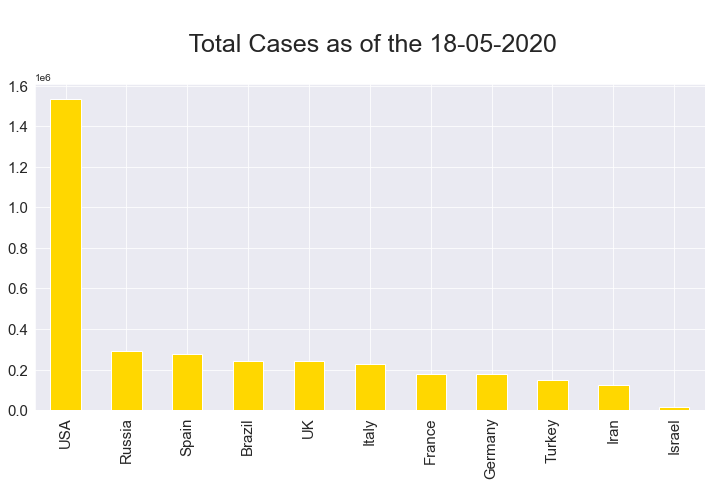

In [33]:
plotGraph(column='Total Cases',plot='bar')

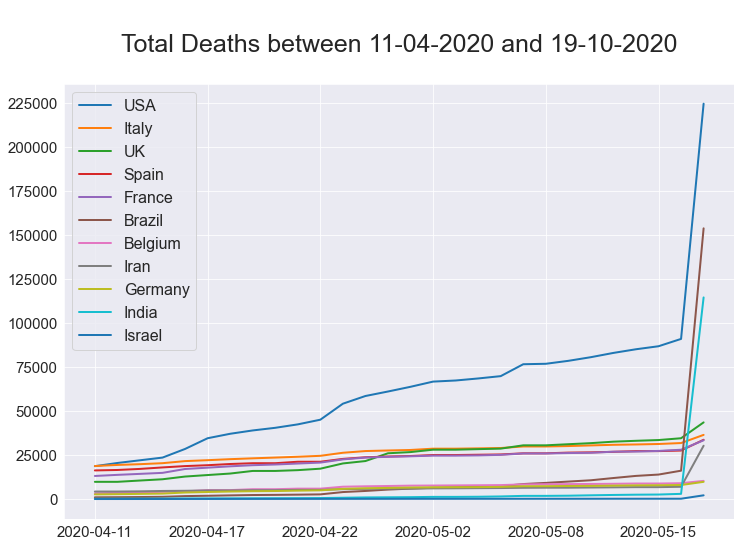

In [3]:
plotGraph(column='Total Deaths')

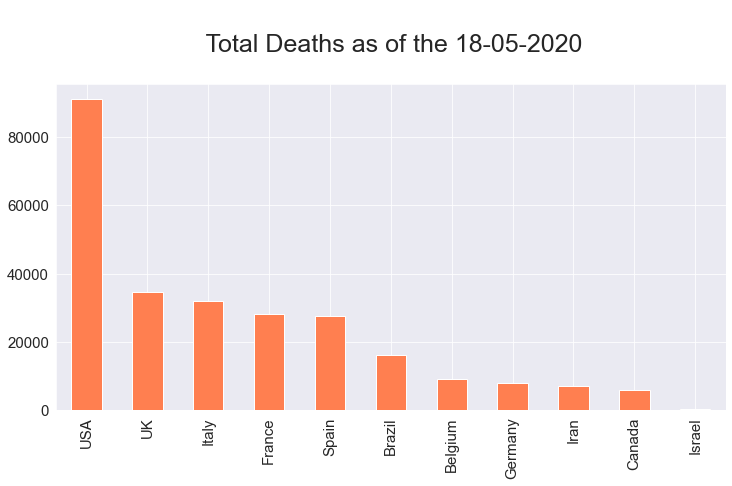

In [35]:
plotGraph(column='Total Deaths',plot='bar')

In [36]:
# Aggregation kind 

plotGraph(column='Total Cases',plot='agg')



		The Total Cases of the world as of the 18-05-2020 is: 

				  4820579 




In [37]:
plotGraph(column='Total Cases',plot='agg')



		The Total Cases of the world as of the 18-05-2020 is: 

				  4820579 




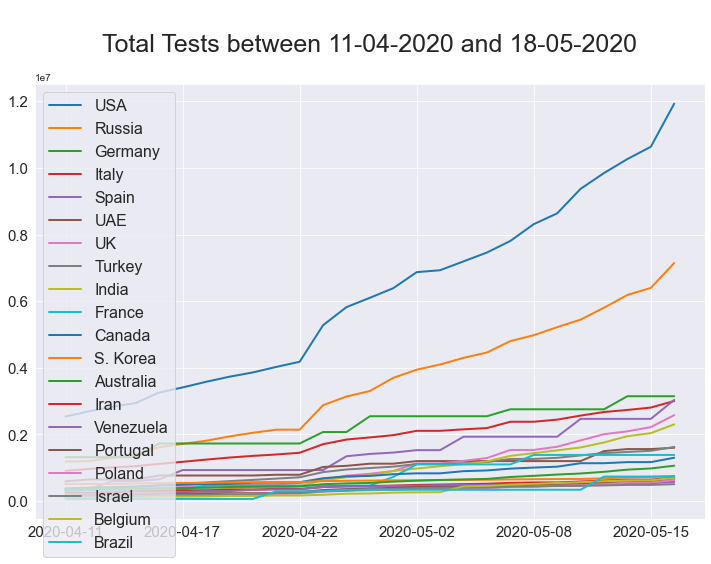

In [38]:
plotGraph(column='Total Tests',top = (0,20),drop=['USA'])
# top 20 countries without 'USA'.

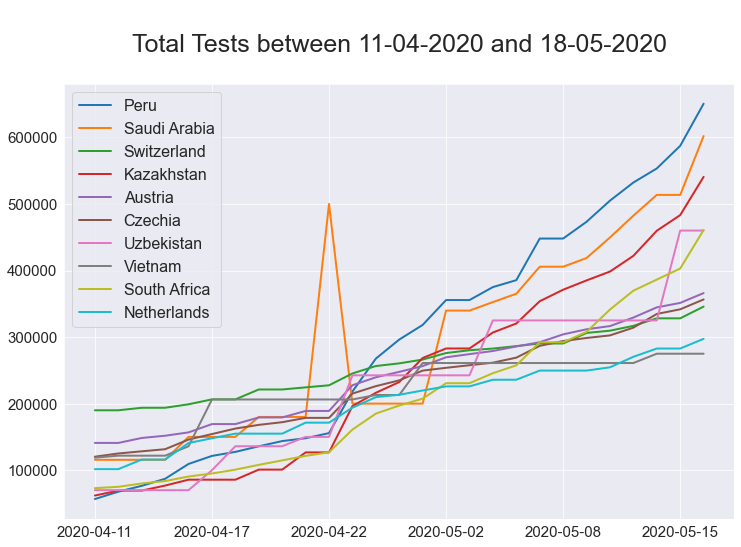

In [39]:
plotGraph(column='Total Tests',top = (20,30),add=[])
#top 10 countries from 20th place onwards to the 30th place (not included).

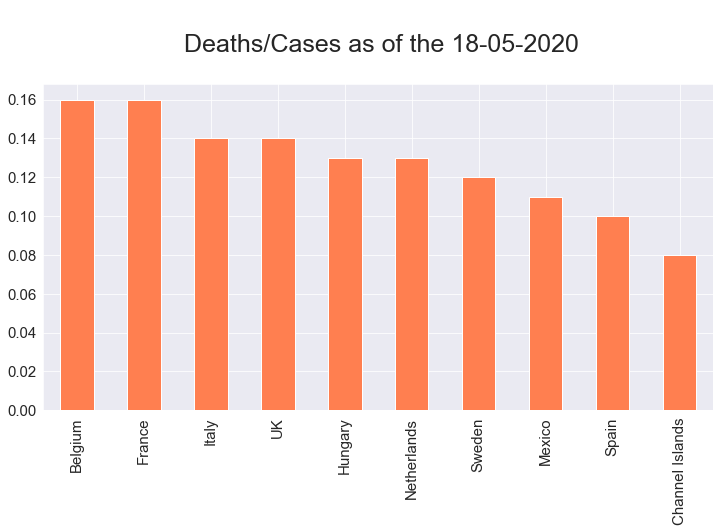

In [40]:
plotGraph(column='Deaths/Cases',plot='bar',add=[])

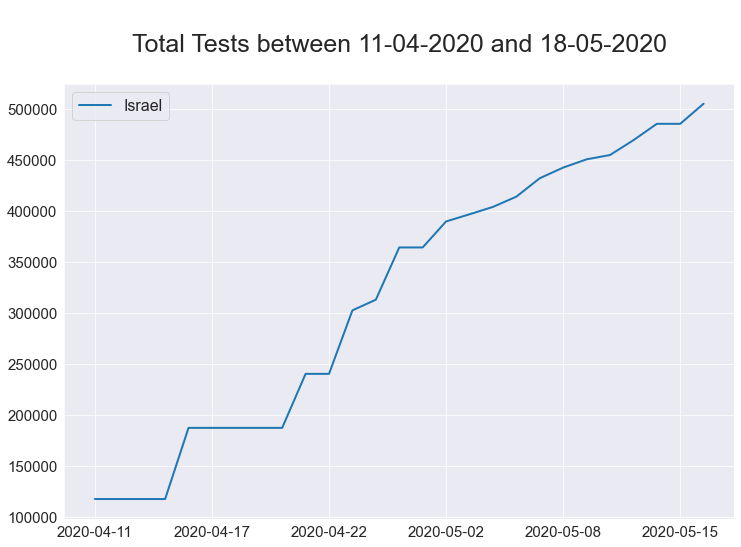

In [41]:
plotGraph(column='Total Tests',top = (0,0))
#total tests for Israel - (The deafault country)

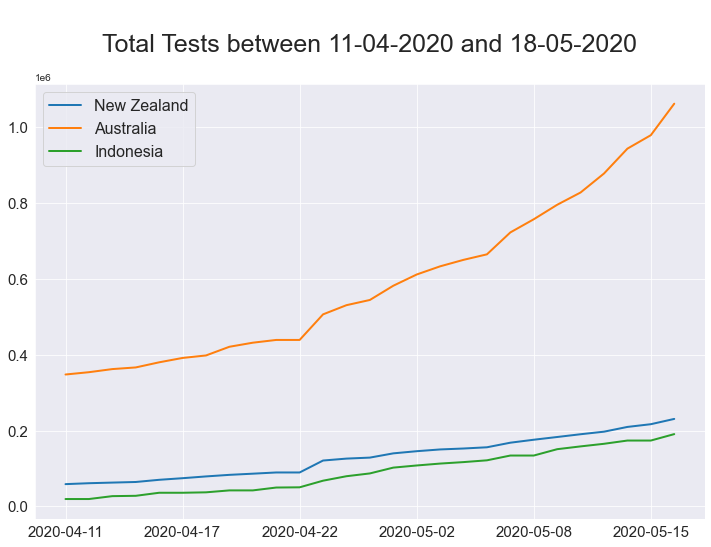

In [42]:
#Choosing specific countries
plotGraph(column='Total Tests',top = (0,0),add=['New Zealand','Australia','Indonesia'])

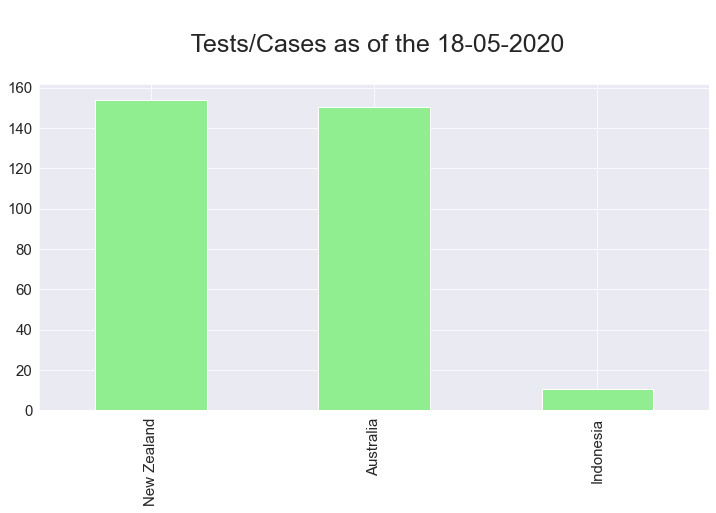

In [43]:
#Choosing specific countries
plotGraph(column='Tests/Cases',plot='bar',top = (0,0) , add=['New Zealand','Australia','Indonesia'])

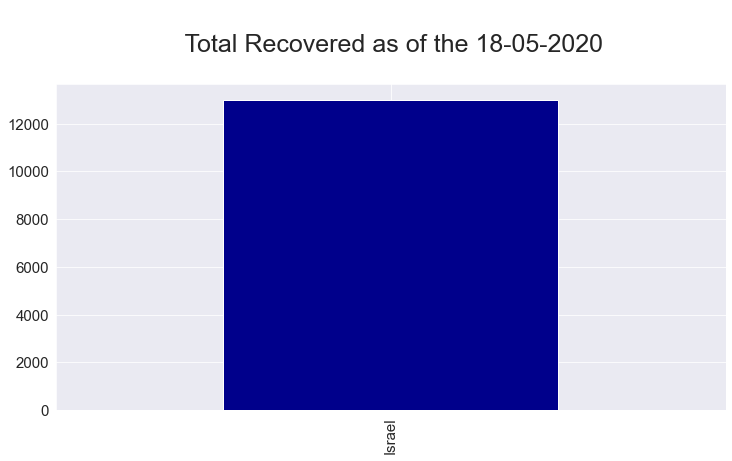

In [44]:
plotGraph(column='Total Recovered',top = (0,0),plot='bar')
#Israel recovered sum(approx. 12K until 18/05/2020)

In [45]:
plotGraph(column='Cases/1M pop',plot='agg')
# A warning after trying to aggregate a ratio column


	 It is not wise to aggregate a ratio column.
	 Remember, the avg. of a ratio column isn't the weighted ratio. 
	 Please try a 'Total'-kind column.
